<a href="https://colab.research.google.com/github/SWATIMORE-COLAB/ML-Internship/blob/master/ML_INTERNSHIP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [10]:
#reading Data in python
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# To display the bottom 5 rows
df.tail(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [12]:
# for getting information about data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [13]:
#Dropping the uneccessary Columns
df = df.drop(['Market Category','Number of Doors','Engine Fule Type'] , axis = 1)

KeyError: ignored

In [16]:
#renaming the columns
df.rename(columns={"Engine HP" : "HP",
                        "Engine Cylinders":"Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C",
                        "MSRP":"Price"
                        },
               inplace=True
               )
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
#Total number of rows and columns
df.shape

(11914, 16)

In [15]:
# Rows containing duplicate data
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         Make     Model  Year  ... city mpg  Popularity   MSRP
14        BMW  1 Series  2013  ...       19        3916  31500
18       Audi       100  1992  ...       17        3105   2000
20       Audi       100  1992  ...       17        3105   2000
24       Audi       100  1993  ...       17        3105   2000
25       Audi       100  1993  ...       17        3105   2000
...       ...       ...   ...  ...      ...         ...    ...
11481  Suzuki      X-90  1998  ...       22         481   2000
11603   Volvo      XC60  2017  ...       20         870  46350
11604   Volvo      XC60  2017  ...       23         870  40950
11708  Suzuki       XL7  2008  ...       15         481  29149
11717  Suzuki       XL7  2008  ...       16         481  27499

[715 rows x 16 columns]


In [17]:
# Used to count the number of rows before removing the data
df.count() 

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Market Category      8172
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
Price               11914
dtype: int64

In [18]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
#Total no of rows and columns
df.shape

(11199, 16)

In [20]:
# Counting the number of rows after removing duplicates.
df.count()

Make                11199
Model               11199
Year                11199
Engine Fuel Type    11196
HP                  11130
Cylinders           11169
Transmission        11199
Drive Mode          11199
Number of Doors     11193
Market Category      7823
Vehicle Size        11199
Vehicle Style       11199
MPG-H               11199
MPG-C               11199
Popularity          11199
Price               11199
dtype: int64

In [21]:
# Finding the null values.
print(df.isnull().sum())

Make                   0
Model                  0
Year                   0
Engine Fuel Type       3
HP                    69
Cylinders             30
Transmission           0
Drive Mode             0
Number of Doors        6
Market Category     3376
Vehicle Size           0
Vehicle Style          0
MPG-H                  0
MPG-C                  0
Popularity             0
Price                  0
dtype: int64


In [22]:
#Dropping the missing values
df = df.dropna()
df.count()

Make                7735
Model               7735
Year                7735
Engine Fuel Type    7735
HP                  7735
Cylinders           7735
Transmission        7735
Drive Mode          7735
Number of Doors     7735
Market Category     7735
Vehicle Size        7735
Vehicle Style       7735
MPG-H               7735
MPG-C               7735
Popularity          7735
Price               7735
dtype: int64

In [23]:
# After dropping the values
print(df.isnull().sum()) 

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Market Category     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


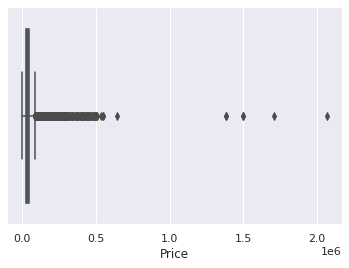

In [27]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=df['Price'])

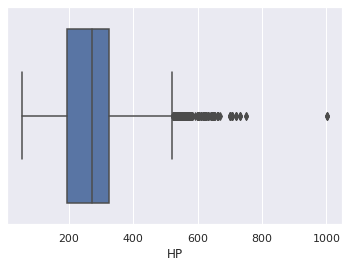

In [28]:
sns.boxplot(x=df["HP"])

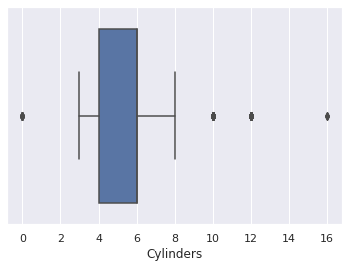

In [30]:
sns.boxplot(x=df['Cylinders'])

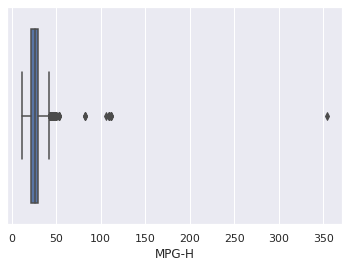

In [31]:
sns.boxplot(x=df['MPG-H'])

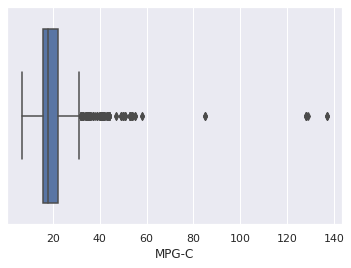

In [32]:
sns.boxplot(x=df['MPG-C'])

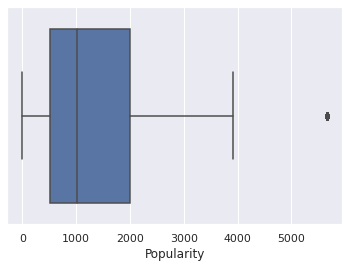

In [29]:
sns.boxplot(x=df["Popularity"])

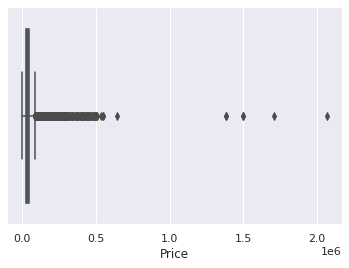

In [33]:
sns.boxplot(x=df['Price'])

In [34]:
#Finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


In [35]:
#Removing Outliners
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

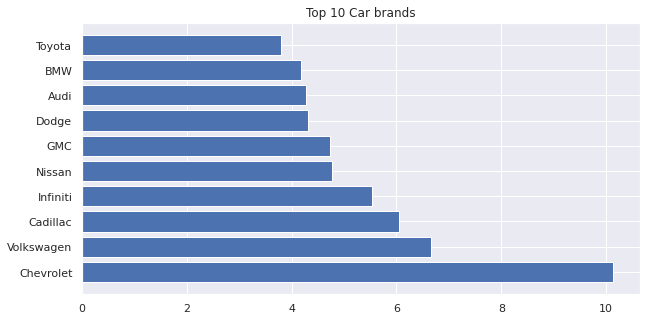

In [36]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()


In [37]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   34804.256140
Dodge       30237.995868
GMC         37863.725564
Honda       29311.985294
Mazda       25898.916256
Nissan      33645.876866
Toyota      32619.345794
Volkswagen  30344.291444


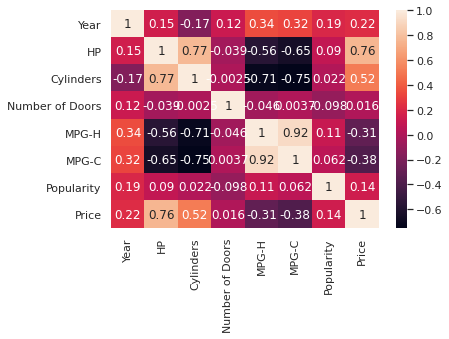

In [38]:
#Plotting Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

### From the heatmap plotted above, it can be concluded that:

**>>> Price is positively dependent on features and Horse Power(HP) and Year.**

 **>>> The features HP and Cylinders are positively dependent on each other.**

 i.e.if number of Cylinders are increased,the HP also increases.

 **>>>MPG-H and MPG-C have strong negative correlation with Cylinders.**

i.e. if number of cylinders are increased, MPG-H and MPG-C decreases.

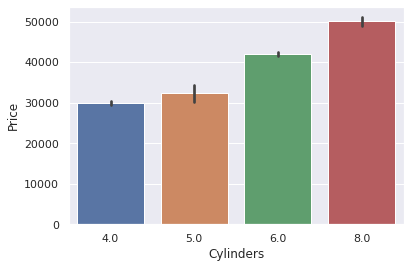

In [40]:
sns.barplot(df['Cylinders'],df['Price'])

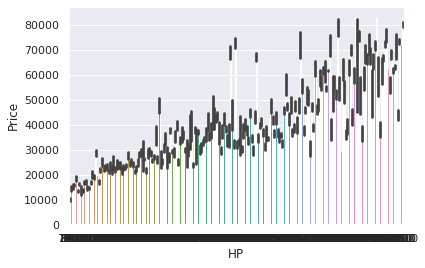

In [41]:
sns.barplot(df['HP'],df['Price'])

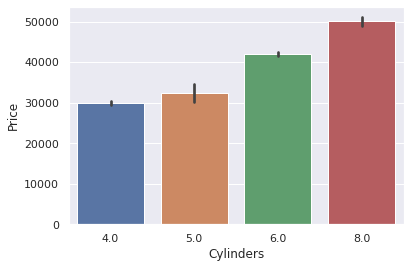

In [42]:
sns.barplot(df['Cylinders'],df['Price'])

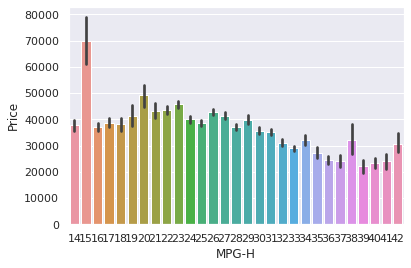

In [44]:
sns.barplot(df['MPG-H'],df['Price'])

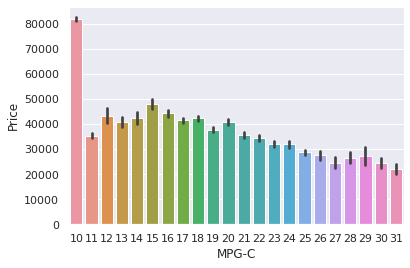

In [45]:
sns.barplot(df['MPG-C'],df['Price'])

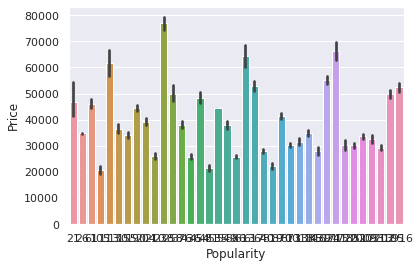

In [46]:
sns.barplot(df['Popularity'],df['Price'])

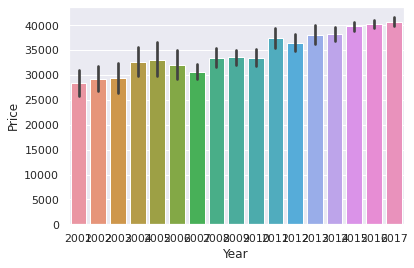

In [47]:
sns.barplot(df['Year'],df['Price'])

In [48]:
dcc = df.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission', 'Drive Mode',
       'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [49]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc = LabelEncoder()
for i in dcc:
  df[i] = label_enc.fit_transform(df[i])
print('Label Encoded Data')
df.head()

Label Encoded Data


,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,3,2011,5,335.0,6.0,2,3,2.0,26,0,8,26,19,3916,46135
1,3,2,2011,5,300.0,6.0,2,3,2.0,51,0,6,28,19,3916,40650
2,3,2,2011,5,300.0,6.0,2,3,2.0,48,0,8,28,20,3916,36350
3,3,2,2011,5,230.0,6.0,2,3,2.0,51,0,8,28,18,3916,29450
4,3,2,2011,5,230.0,6.0,2,3,2.0,47,0,6,28,18,3916,34500


In [50]:
y = df['Price']

In [51]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

NameError: ignored